# DAV 5400 Project 4 (M13)

																				

### Introduction:

The company gathered data about customers to whom they offered the new product. We are given information about
whether they did or did not sign up for the new product, together with some customer information and information
about their buying behavior of two other products (Product A and Product B).

The purpose of this project is to determine the selected predictor columns that most accurately predicts whether or not a customer is likely to purchase an additional product. The objective is to analyze the data to understand different variables and their distributions.

The company plans to use the output of such a model in an attempt to improve its customer retention and sales practices.

### Data Dictionary

| Attribute  | Description |
|---|---|
| ID | Unique customer identifier |
| TARGET Loyalty | Indicator of customer buying the new product (N = no, Y = yes) |
| Age | Customer age in years |
| City | Unique code per city (where the customer resides) |
| Age_p | Age of customer’s partner in years |
| LOR_m | Length of customer's relationship with company (in months) |
| Prod_A | Customer previously bought Product A (0=no, 1=yes) |
| Type_A | Type of product A |
| Turnover_A | Amount of money customer spent on Product A
| Prod_B | Customer previously bought Product B (0=no, 1=yes) |
| Type_B | Type of product B |
| Turnover_B | Amount of money customer spent on Product B

### Data Acquisition:

The dataset file can be accessed from the following URL:
https://raw.githubusercontent.com/karinathpa/DAV-5400/main/Project%204%20DATA.csv


### Data Preparation:

To start with, we will import the necessary libraries and read the dataset from the GitHub repository into a Jupyter Notebook.

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


# Import sklearn libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Notebook setting to display all the rows and columns .

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns',None)

# Ignoring warnings

import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset from the GitHub repository

url = 'https://raw.githubusercontent.com/karinathpa/DAV-5400/main/Project%204%20DATA.csv'
df = pd.read_csv(url)

# Display the first five rows of the dataset

df.head()

,TARGET,loyalty,ID,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,333.561114,264.721010,66,3
1,Y,1,159,45,2,1,3,3,1,394.735699,284.904978,45,39
2,Y,1,220,42,2,1,3,6,1,342.180990,1175.589721,42,27
3,Y,99,303,31,2,0,0,0,0,453.757916,242.341754,31,3
4,Y,99,306,62,2,0,0,0,0,384.577469,287.008370,62,3


In [4]:
df.info() # Checking the data for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   prod_A      14016 non-null  int64  
 6   type_A      14016 non-null  int64  
 7   type_B      14016 non-null  int64  
 8   prod_B      14016 non-null  int64  
 9   turnover_A  14016 non-null  float64
 10  turnover_B  14016 non-null  float64
 11  age_P       14016 non-null  int64  
 12  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 1.4+ MB


#### Details

- By info() we can se the summary of the dataframe.
- We can see there are 13 columns with index starting from 0 to 12.
- Got the data types of each columns
- There are total 14016 rows in the dataframe.
- Each column has no null values.
- We can also see the data types of each column.

-----------------

In [5]:
df.describe() # Generate descriptive statistics

,loyalty,ID,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000
mean,50.381778,37672.440068,35.882920,-710.950128,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,35.882920,14.115582
std,48.471790,44855.639209,12.974634,26702.329184,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,12.974634,11.582550
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,5.000000,3.000000
25%,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,25.000000,3.000000
50%,3.000000,13514.500000,33.000000,2.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,33.000000,15.000000
75%,99.000000,62738.000000,43.000000,2.000000,1.000000,3.000000,3.000000,1.000000,399.744924,264.131538,43.000000,15.000000
max,99.000000,151811.000000,102.000000,235.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,102.000000,75.000000


In [5]:
df.index # The index (row labels) of the DataFrame.

RangeIndex(start=0, stop=14016, step=1)

In [6]:
# Create a pandas DataFrame with a subset of columns

df_subset = df[['TARGET', 'age', 'type_A', 'type_B', 'lor_M', 'turnover_A', 'turnover_B']]

- Next, we will convert the TARGET indicators in the first column to digits, with "N" becoming 0 and "Y" becoming 1.

In [7]:
# Converting the TARGET indicators to digits

df_subset['TARGET'] = df_subset['TARGET'].replace({'N': 0, 'Y': 1})

### EDA 

#### Univariate

- Let's see the distribution of data for each of the columns we selected, including the Age, Type_A, Type_B, lor_M columns.

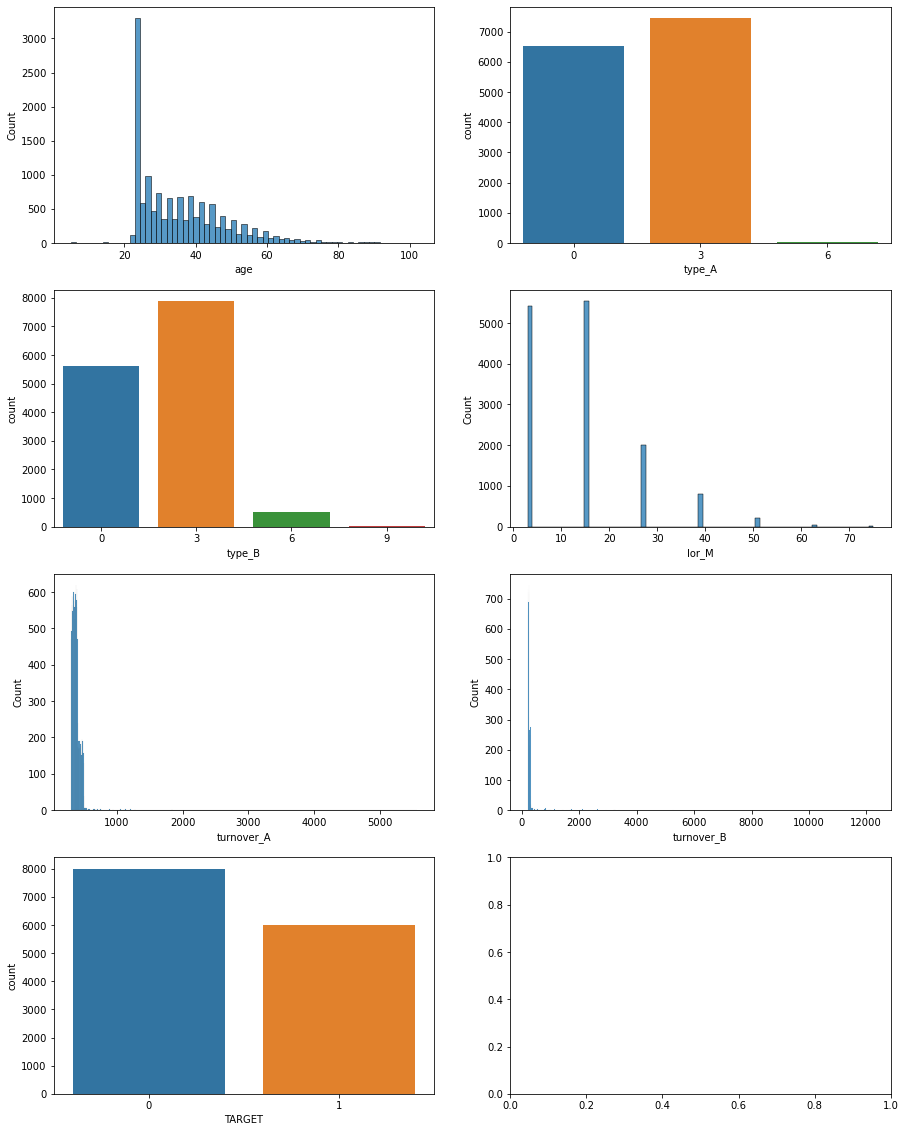

In [8]:
# Distribution of data for each of the selected columns

fig, axs = plt.subplots(4, 2, figsize=(15, 20)) # Setting the subplots rows & columns
sns.histplot(data=df_subset, x='age', ax=axs[0, 0]) # Histogram plot
sns.countplot(data=df_subset, x='type_A', ax=axs[0, 1]) # Count plot
sns.countplot(data=df_subset, x='type_B', ax=axs[1, 0]) # Count plot
sns.histplot(data=df_subset, x='lor_M', ax=axs[1, 1]) # Histogram plot
sns.histplot(data=df_subset, x='turnover_A', ax=axs[2, 0]) # Histogram plot
sns.histplot(data=df_subset, x='turnover_B', ax=axs[2, 1]) # Histogram plot
sns.countplot(data=df_subset, x='TARGET', ax=axs[3, 0]) # Countplot plot
plt.show()

### Inferences:

- Customers of age between 20-40 seems to be more active in buying products
- Customers mostly prefer product type '3' from both the product types i.e., 'A' & 'B'
- Customers who buy mostly have a tenurity between 3 to 15
- The amount of money customers spent of 'Product A' is more than 'Product B' which can be concluded w.r.t to the density from both the graphs
- The amount of customers not buying the product is more than buying irrespective of all product types

## Bivariate

- Now between TARGET vs. Age, TARGET vs. Type_A, TARGET vs. Type_B, TARGET vs. lor_M, as well as the other columns that we selected.

### Plot for TARGET Vs Age

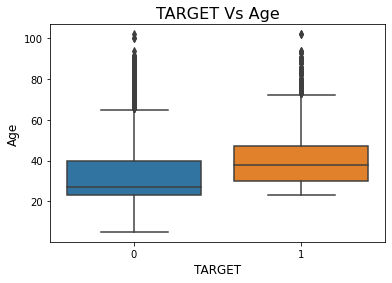

In [9]:
# TARGET Vs Age Plot

sns.boxplot(data=df_subset, x='TARGET', y='age') # Boxplot for target & age columns

plt.title('TARGET Vs Age', fontsize=16)
plt.xlabel('TARGET', fontsize=12) 
plt.ylabel('Age', fontsize=12)
plt.show()

#### Inferences

- The median age for a customer buying a new product is 40
- The above boxplot is rightly skewed & has outliers
- Target variable '0' has a wider interquartile range (IQR) as compared to target '1', indicating greater variability in the ages of target '0'.

In [10]:
count_type_A = df_subset.groupby(['type_A', 'TARGET']).size().reset_index(name='count') # Grouping the columns for size
pivot_count_type_A = count_type_A.pivot(index='type_A', columns='TARGET', values='count') # Pivoting the columns

pivot_count_type_A # Eyeballing the data

TARGET,0,1
type_A,,
0,2616,3918
3,5368,2084
6,16,14


### Plot for TARGET Vs Type_A

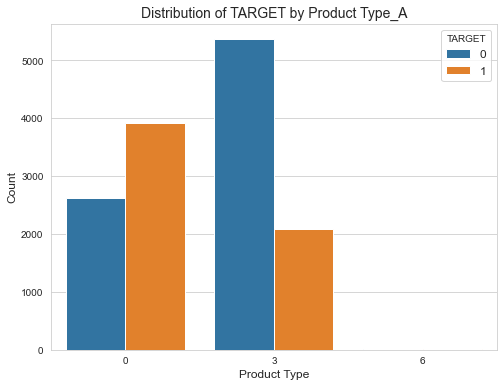

In [11]:
# TARGET Vs Type_A Plot

sns.set_style('whitegrid') # Setting the style for the plot
plt.figure(figsize=(8,6)) # Setting the figure size
sns.countplot(x='type_A', hue='TARGET', data=df_subset) # Countplot for TARGET Vs Type_A columns
plt.title('Distribution of TARGET by Product Type_A', fontsize=14)
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='TARGET', fontsize=12) # legend within the plot for TARGET column
plt.show()

#### Inferences

- The most frequent product type is '3 followed by '0'.
- The plot also suggest that the customers possibility of buying a new product is more for product type '0' than product type '3'.
- The product type '6' is chosen by too few customers

In [12]:
count_type_B = df_subset.groupby(['type_B', 'TARGET']).size().reset_index(name='count') # Grouping the columns for size
pivot_count_type_B = count_type_B.pivot(index='type_B', columns='TARGET', values='count')  # Pivoting the columns

pivot_count_type_B # Eyeballing the data

TARGET,0,1
type_B,,
0,2042,3572
3,5516,2358
6,411,82
9,31,4


### Plot for TARGET Vs Type_B

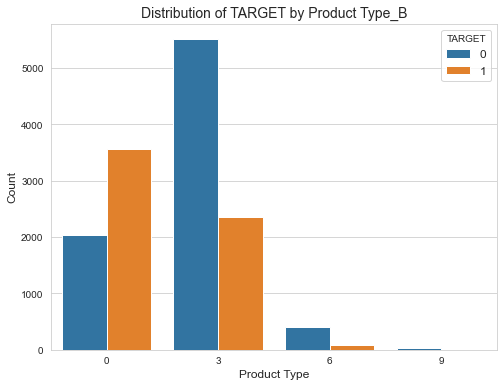

In [13]:
# TARGET Vs Type_B

sns.set_style('whitegrid')  # Setting the style for the plot
plt.figure(figsize=(8,6))  # Setting the figure size
sns.countplot(x='type_B', hue='TARGET', data=df_subset) # Countplot for TARGET Vs Type_B columns
plt.title('Distribution of TARGET by Product Type_B', fontsize=14)
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='TARGET', fontsize=12) # legend within the plot for TARGET column
plt.show()

#### Inferences

- The most frequent product type is '3 followed by '0'.
- The plot also suggest that the customers possibility of buying a new product is more for product type '0' than product type '3'.
- The product types '6' & '9' are chosen by too few customers

### Plot for TARGET Vs lor_M

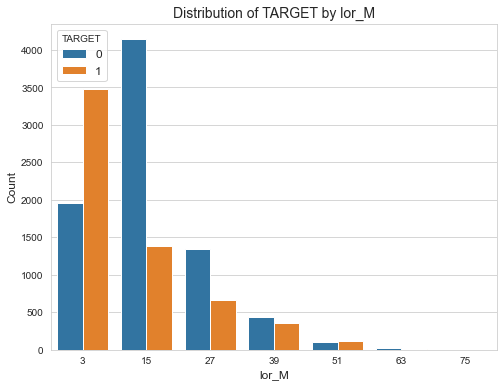

In [14]:
# TARGET Vs lor_M Plot

sns.set_style('whitegrid') # Setting the style for the plot
plt.figure(figsize=(8,6)) # Setting the figure size
sns.countplot(x='lor_M', hue='TARGET', data=df_subset)
plt.title('Distribution of TARGET by lor_M', fontsize=14) # Countplot for TARGET Vs lor_M columns
plt.xlabel('lor_M', fontsize=12) 
plt.ylabel('Count', fontsize=12)
plt.legend(title='TARGET', fontsize=12) # legend within the plot for TARGET column
plt.show()

#### Inferences

- Customers who buy a product is high for '3' months of tenurity followed by '15', '27' and gradually decreases.
- Customers who do not buy a product is high for '15' months of tenurity followed by '3', '27' and gradually decreases.

### Plot for TARGET Vs turnover_A

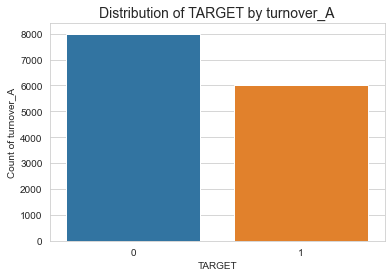

In [15]:
# TARGET Vs turnover_A Plot

count_df = df_subset.groupby('TARGET')['turnover_A'].size().reset_index(name='count') # Grouping the columns for size

sns.barplot(x='TARGET', y='count', data=count_df) # Barplot for TARGET and count
plt.title('Distribution of TARGET by turnover_A', fontsize=14) # Plot's title
plt.xlabel('TARGET')
plt.ylabel('Count of turnover_A')
plt.show()

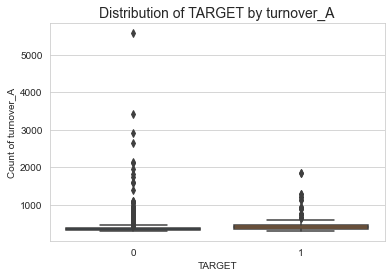

In [16]:
sns.boxplot(x='TARGET', y='turnover_A', data=df_subset) # Boxplot for TARGET and turnover_A
plt.title('Distribution of TARGET by turnover_A', fontsize=14) # Plot's title
plt.xlabel('TARGET')
plt.ylabel('Count of turnover_A')
plt.show()

#### Inferences

- Amount of money customer spent on Product A is higher where Indicator of customer buying the new product is no/0
- The boxplot between TARGET Vs turnover_A seems to have a lot fo outliers

### Plot for TARGET Vs turnover_B

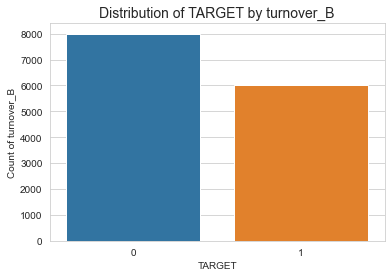

In [17]:
# TARGET Vs turnover_B Plot

count_df = df_subset.groupby('TARGET')['turnover_B'].size().reset_index(name='count') # Grouping the columns for size

sns.barplot(x='TARGET', y='count', data=count_df)  # Barplot for TARGET and count
plt.title('Distribution of TARGET by turnover_B', fontsize=14) # Plot's title
plt.xlabel('TARGET')
plt.ylabel('Count of turnover_B')
plt.show()

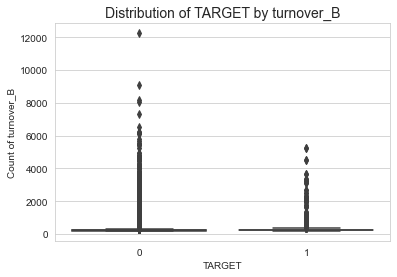

In [18]:
# TARGET Vs turnover_B

sns.boxplot(x='TARGET', y='turnover_B', data=df_subset) # Boxplot for TARGET and turnover_A
plt.xlabel('TARGET')
plt.ylabel('Count of turnover_B')
plt.title('Distribution of TARGET by turnover_B', fontsize=14) # Plot's title
plt.show()

#### Inferences

- Amount of money customer spent on Product B is higher where Indicator of customer buying the new product is no/0
- The boxplot between TARGET Vs turnover_A seems to have a lot fo outliers

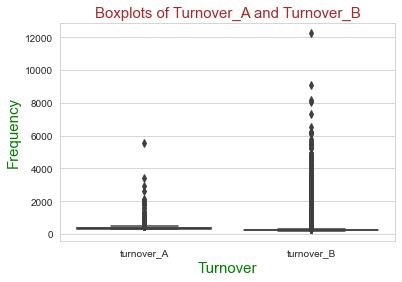

In [19]:
# turnover_A Vs turnover_B Plot

sns.boxplot(data=df_subset[['turnover_A', 'turnover_B']]) # Boxplot for columns turnover_A and turnover_B
plt.title('Boxplots of Turnover_A and Turnover_B', fontdict={'fontsize':60, 'fontsize':15, 'color':'Brown'}) # Plot's title
plt.xlabel('Turnover', fontdict={'fontsize':50, 'fontsize':15, 'color':'Green'})
plt.ylabel('Frequency', fontdict={'fontsize':50, 'fontsize':15, 'color':'Green'})
plt.show()

#### Inference:

- The boxplot of 'Turnover_A' and 'Turnover_B' shows that there are more customers who have bought Product B and has the higher Turnover than Product A.
- The boxplot also shows a few outliers in both the turnovers A and B, which could be further investigated.

## Preliminary Conclusions:

    Based on our EDA, we can make some preliminary conclusions about the columns in our subset.

- The median age for a customer buying a new product is 40, so age seems to be a strong predictor for a customer to likely purchase an additional product.
- For the Type_A and Type_B, product type '0' is another predictor which suggests that customers are likely to buy this product type coampred to the other product types.
- Customers who have been associated with the company for a shorter duration are more likely to buy the new product
- The Turnover_A & Turnover_B do not show seem to be promising predictor columns, yet they do show some potential patterns worth exploring further

### Creating dummy variables for Type_A and Type_B

In [20]:
# Creating dummies for 'type_A', 'type_B' columns

df_subset = pd.get_dummies(df_subset, columns=['type_A', 'type_B'], drop_first=True) 

In [21]:
# Checking the dataframe with dummies

df_subset.head()

,TARGET,age,lor_M,turnover_A,turnover_B,type_A_3,type_A_6,type_B_3,type_B_6,type_B_9
0,1,66,3,333.561114,264.721010,0,0,0,0,0
1,1,45,39,394.735699,284.904978,1,0,1,0,0
2,1,42,27,342.180990,1175.589721,1,0,0,1,0
3,1,31,3,453.757916,242.341754,0,0,0,0,0
4,1,62,3,384.577469,287.008370,0,0,0,0,0


### Phase-II: Building Predictive Model

In [22]:
# Defining target & predictor variables

X = df_subset.drop('TARGET', axis=1) # Dropping the dependent variable from 'X' to only have independent variables

y = df_subset['TARGET'] # Assigning dependent variable to 'y'

In [23]:
# Splitting data into train & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
# Fitting the data into the model

logreg = LogisticRegression() # Creates an instance of the LogisticRegression class and assigns it to a variable called "logreg"

from sklearn.feature_selection import RFE # Importing RFE class from scikit-learn (sklearn) library's feature_selection module

rfe = RFE(estimator = logreg, n_features_to_select = 6)  # Running RFE to choose 6 variables as output

rfe = rfe.fit(X_train, y_train)  # 'Eliminating the least important features 

In [25]:
top_6 = list(X_train.columns[rfe.support_]) # To get the 6 features selected using RFE

top_6 # Displaying top 6 features

# These are the top 6 predictor columns that have a chance of predicting whether or not customer is likely to purchase an additional product.

['age', 'type_A_3', 'type_A_6', 'type_B_3', 'type_B_6', 'type_B_9']

In [26]:
# Features not chosen by RFE

list(X_train.columns[~rfe.support_])

['lor_M', 'turnover_A', 'turnover_B']

In [27]:
 # Selecting 6 features from the X_train DataFrame and creating a new DataFrame containing only those columns i.e., X_train_top_cols

X_train_top_cols = X_train[top_6]

In [28]:
# Building the 1st logistic regression model

import statsmodels.api as sm # Importing sm from statsmodels library

X_train_logmod_1 = sm.add_constant(X_train_top_cols) # Adding a constant column of ones to the left-hand side of the X_train_top_cols'

logreg_1 = sm.Logit(y_train,X_train_logmod_1).fit() # Fitting logistic regression model to the training data

print(logreg_1.summary()) # Printing the summary of the results

Optimization terminated successfully.
         Current function value: 0.582697
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                 9811
Model:                          Logit   Df Residuals:                     9804
Method:                           MLE   Df Model:                            6
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.1476
Time:                        21:49:11   Log-Likelihood:                -5716.8
converged:                       True   LL-Null:                       -6707.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2013      0.076    -15.842      0.000      -1.350      -1.053
age            0.0502      0.

In [29]:
# type_A_3 has the highest P-value, hence dropping it

X_train_top_cols1 = X_train_top_cols.drop(['type_A_3'], axis = 1)

In [30]:
# 2nd logistic regression model

X_train_logmod_2 = sm.add_constant(X_train_top_cols1) # Adding a constant column of ones to the left-hand side of the X_train_top_cols'

logreg_2 = sm.Logit(y_train,X_train_logmod_2).fit() # Fitting logistic regression model to the training data

print(logreg_2.summary()) # Printing the summary of the results

Optimization terminated successfully.
         Current function value: 0.582841
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                 9811
Model:                          Logit   Df Residuals:                     9805
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.1474
Time:                        21:49:12   Log-Likelihood:                -5718.3
converged:                       True   LL-Null:                       -6707.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1764      0.074    -15.828      0.000      -1.322      -1.031
age            0.0494      0.

In [31]:
print('1st regression current function value is:', logreg_1.llf)

print('2nd regression current function value is:', logreg_2.llf)

1st regression current function value is: -5716.844288795049
2nd regression current function value is: -5718.251785879054


### The above models don't differ much, hence going with the 1st model to test



In [32]:
from sklearn.metrics import accuracy_score # Importing accuracy metric from sklearn library

y_pred = logreg_1.predict(sm.add_constant(X_test[top_6]))

accuracy = accuracy_score(y_test, y_pred.round()) # Accuracy of the model

accuracy # Printing the accuracy

0.7063020214030915

In [33]:
from sklearn.metrics import precision_score, recall_score # Importing precision, recall metrics from sklearn library

precision = precision_score(y_test, y_pred.round()) # Calculating precision for the model

recall = recall_score(y_test, y_pred.round()) # Calculating recall for the model

print('Precision value is:', precision) # Printing precision score

print('Recall value is:', recall) # Printing recall score

Precision value is: 0.6672738312082575
Recall value is: 0.6153415453527435


In [34]:
from sklearn.metrics import f1_score # Importing f1 metric from sklearn library

f1 = f1_score(y_test, y_pred.round()) # Calculating f1 score for the model

print('f1 score is:', f1) # Printing f1 score

f1 score is: 0.6402563355665599


In [35]:
from sklearn.metrics import roc_auc_score # Importing roc metric from sklearn library

roc_auc = roc_auc_score(y_test, y_pred) # Calculating ROC score for the model

print('ROC of the model is:', roc_auc) # Printing ROC score for the model

ROC of the model is: 0.7607448868536553


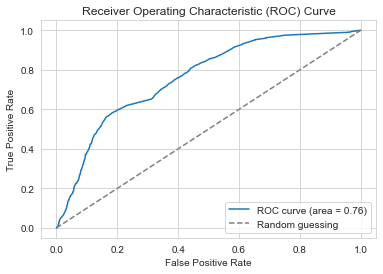

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score  # Importing required libraries

# Assuming y_test and y_pred are the true labels and predicted probabilities, respectively

fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Calculating false positive rate, true positive rate, and thresholds using roc_curve function

roc_auc = roc_auc_score(y_test, y_pred)  # Calculating ROC AUC score using roc_auc_score function

# Plot ROC curve

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)  # Plotting ROC curve using plot function with ROC AUC score included in legend
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guessing')  # Plotting line for random guessing (i.e., no discriminative power)
plt.xlabel('False Positive Rate')  # Setting label for x-axis
plt.ylabel('True Positive Rate')  # Setting label for y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Setting title for plot
plt.legend(loc="lower right")  # Adding legend to plot
plt.show()  # Displaying plot

Text(0, 0.5, 'y_pred')

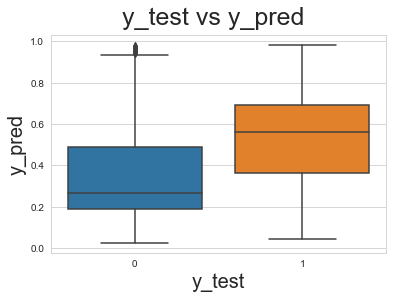

In [37]:
# Evaluating the model

fig = plt.figure()

sns.boxplot(y_test, y_pred)  # Boxplot plot

fig.suptitle('y_test vs y_pred', fontsize = 25)  # Plot title & size

plt.xlabel('y_test', fontsize = 20)  # X axis/label name & size

plt.ylabel('y_pred', fontsize = 20) # Y axis/label name & size

#### Model conclusion:

- The model accuracy score of '0.70' indicates a good model.
- Also, the precision & recall scores of 0.66 & 0.61 respectively.
- The ROC is 0.76 which is high that means the model is better at distinguishing between the two classes.
- This indicates that the model is able to accurately predict the target variable and that there is a strong linear relationship between the target variable and the input features.

### Final Conclusion:

Based on the logistic regression model-1 generated and their coefficients, the variable 'age' has '0.050' coefficient which suggests that age has the greatest impact on whether a customer is likely to purchase an additional product, followed by the variable 'type_A_3' which has coefficient of '0.158'. The coefficients for the other variables vary a lot, indicating that they have less impact on the target variable. However, the dummy variables for Type_B have negative coefficients, suggesting that customers who previously purchased those products are less likely to purchase the new product.

Overall, our logistic regression model-1 suggests that age is the most important variable in predicting whether a customer is likely to purchase an additional product, followed by type_A_3 & then type_A_6.

### Recommendations:

- The company should target specific age groups in order to retain the customers & increase sales.
- The company should concentrate more on customers buying product types type_A_3 & type_A_6 who have a higher chance of buying another product when compared with customers who bought other product types.
- The company should definitely not consider factors such as the tenurity of a customer with the company, amount of money spent by a customer on product A or B as these can affect ustomer retention and sales.